In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e5/sample_submission.csv
/kaggle/input/playground-series-s4e5/train.csv
/kaggle/input/playground-series-s4e5/test.csv


## Data Loading

In [2]:
df_train = pd.read_csv('/kaggle/input/playground-series-s4e5/train.csv')
df_train

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117952,1117952,3,3,4,10,4,5,5,7,10,...,7,8,7,2,2,1,4,6,4,0.495
1117953,1117953,2,2,4,3,9,5,8,1,3,...,9,4,4,3,7,4,9,4,5,0.480
1117954,1117954,7,3,9,4,6,5,9,1,3,...,5,5,5,5,6,5,5,2,4,0.485
1117955,1117955,7,3,3,7,5,2,3,4,6,...,6,8,5,3,4,6,7,6,4,0.495


In [3]:
df_test = pd.read_csv('/kaggle/input/playground-series-s4e5/test.csv')
df_test

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,...,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,...,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,...,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,...,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,...,4,3,2,6,4,6,8,4,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745300,1863257,5,4,8,3,5,4,4,5,5,...,5,6,1,3,5,6,4,4,6,6
745301,1863258,4,4,2,12,4,3,4,3,5,...,3,7,4,4,3,5,5,3,5,4
745302,1863259,5,7,9,5,5,6,7,5,5,...,6,11,3,11,4,5,9,5,5,4
745303,1863260,4,7,6,3,5,2,3,8,6,...,6,6,8,6,2,3,8,7,5,5


## Data Cleaning & Transformation

First, we need to examine and verify the data type of each feature. This step ensures that all data types are correct and consistent, with no errors or mismatches. This way, we can prevent potential issues during analysis or processing caused by incorrect data types.

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

Alright, next up is some number crunching! We'll dive into descriptive statistics to get a feel for the basic characteristics of our data. It’s like getting to know our data on a first-name basis before moving forward

In [5]:
# Desc from our data
df_train.describe(include='all')

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


Finally, let’s hunt for any missing data! Catching these gaps early helps us avoid mistakes in analysis, reduce errors in our model, and even boost performance. A clean dataset makes for a sharper, more accurate machine learning model

In [6]:
missing_values = df_train.isnull().sum()
print(missing_values)
print('---')
missing_values[missing_values > 0]

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64
---


Series([], dtype: int64)

With data cleaning checked off, it’s time to tackle those pesky outliers! Outliers can throw off our model's mojo, so we need to handle them. Here, I’m using the IQR (Interquartile Range) method—any values outside the range between Q1 and Q3 are considered outliers. Let’s keep our model in top shape

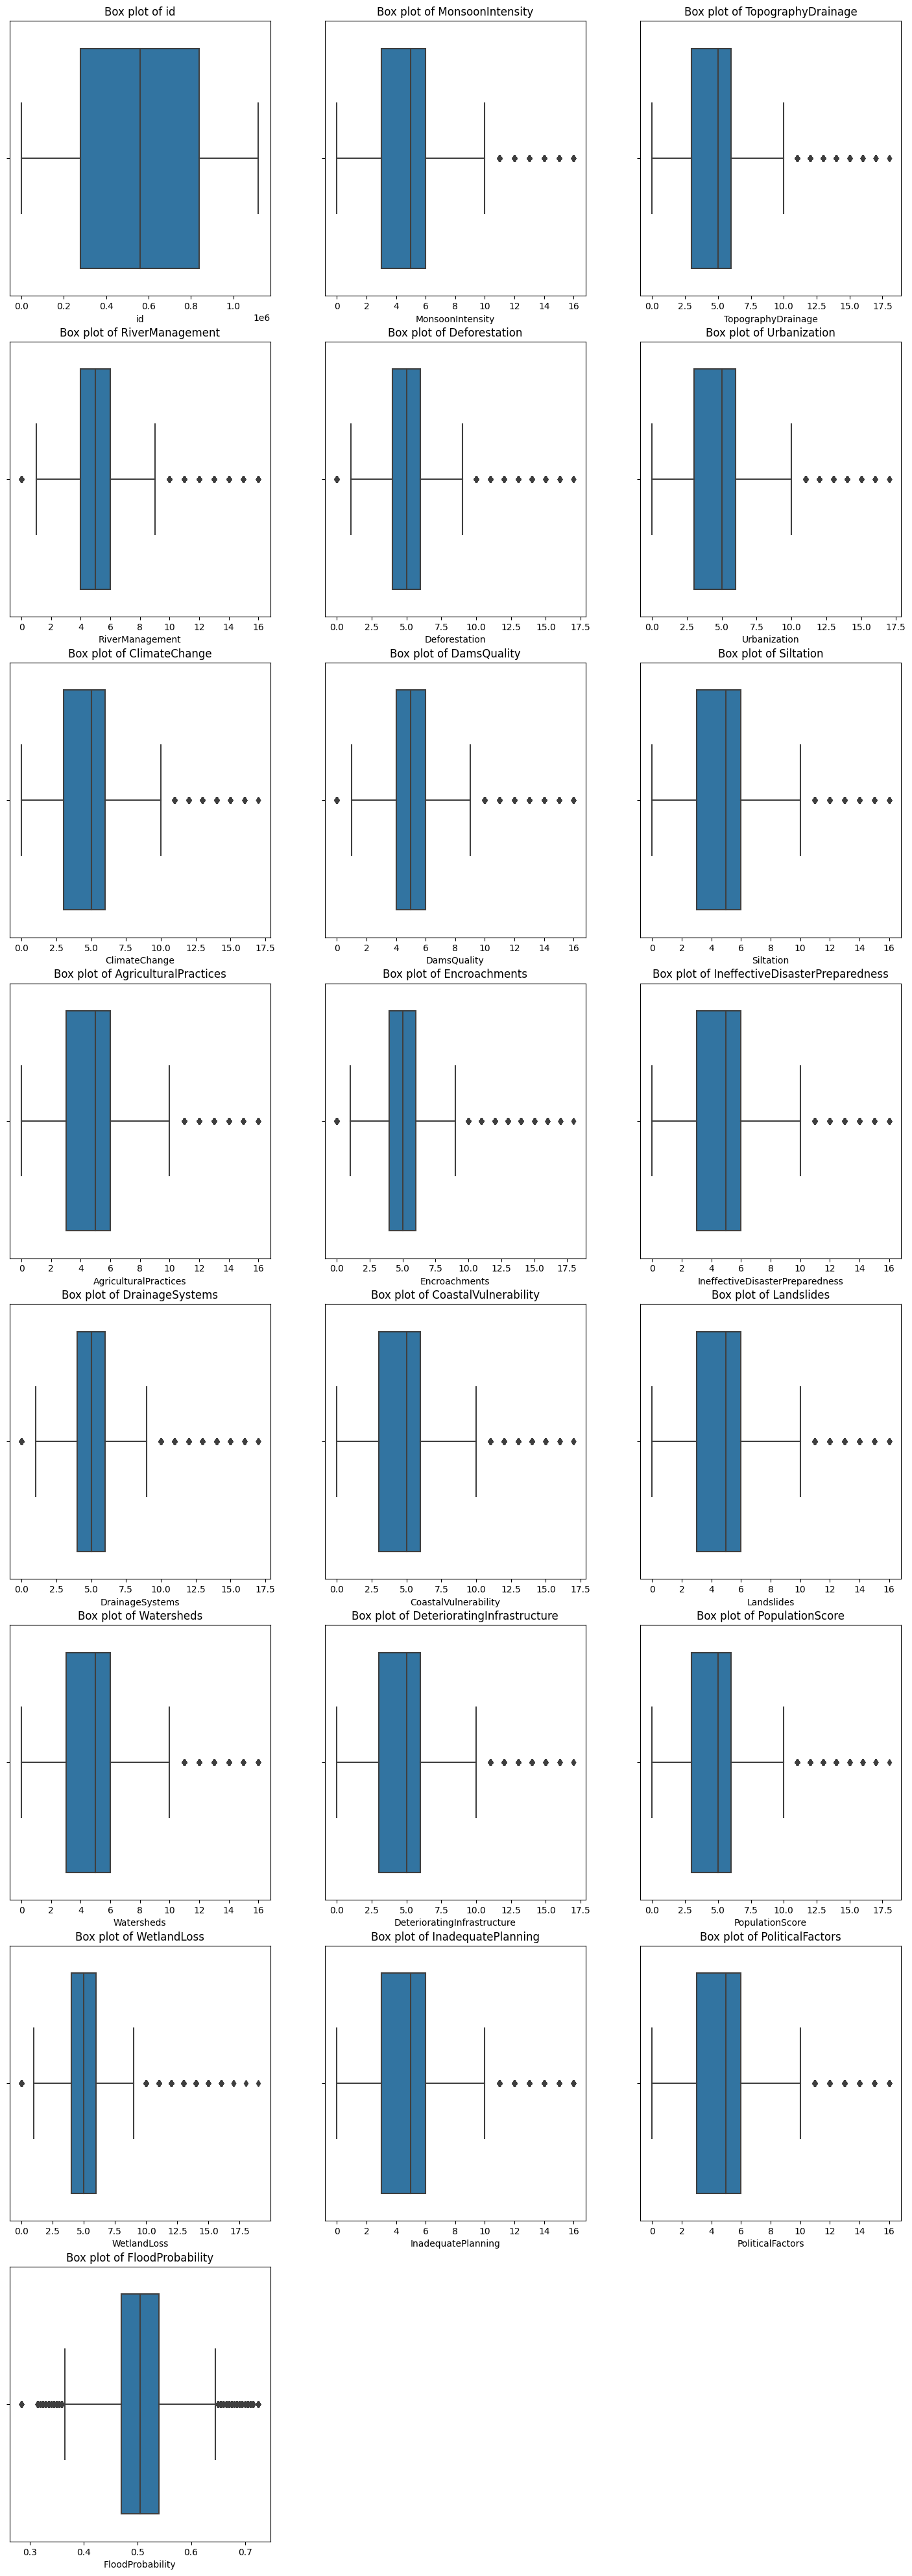

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Calculate number of rows and columns needed for the grid
n_features = len(df_train.columns)
n_cols = 3  # You can adjust this number to change grid width
n_rows = math.ceil(n_features / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
fig.tight_layout(pad=3.0)  # Add padding between subplots

# Flatten axes array for easier iteration
axes = axes.flatten()

# Create boxplots
for idx, feature in enumerate(df_train.columns):
    sns.boxplot(x=df_train[feature], ax=axes[idx])
    axes[idx].set_title(f'Box plot of {feature}')

# Remove empty subplots if any
for idx in range(len(df_train.columns), len(axes)):
    fig.delaxes(axes[idx])

plt.show()

So, any dots or points outside our range are the outliers! We have two options for handling them: either we remove these outliers or adjust them to the nearest moderate value. For now, let’s assume these outliers are just human errors, so we’ll go ahead and remove them using the IQR method.

In [8]:
# Identified outlier using IQR
Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)
IQR = Q3 - Q1

# Dataframe filter to only save row that did not have outliers in numerical column
condition = ~((df_train < (Q1 - 1.5 * IQR)) | (df_train > (Q3 + 1.5 * IQR))).any(axis=1)
df = df_train.loc[condition, df_train.columns]

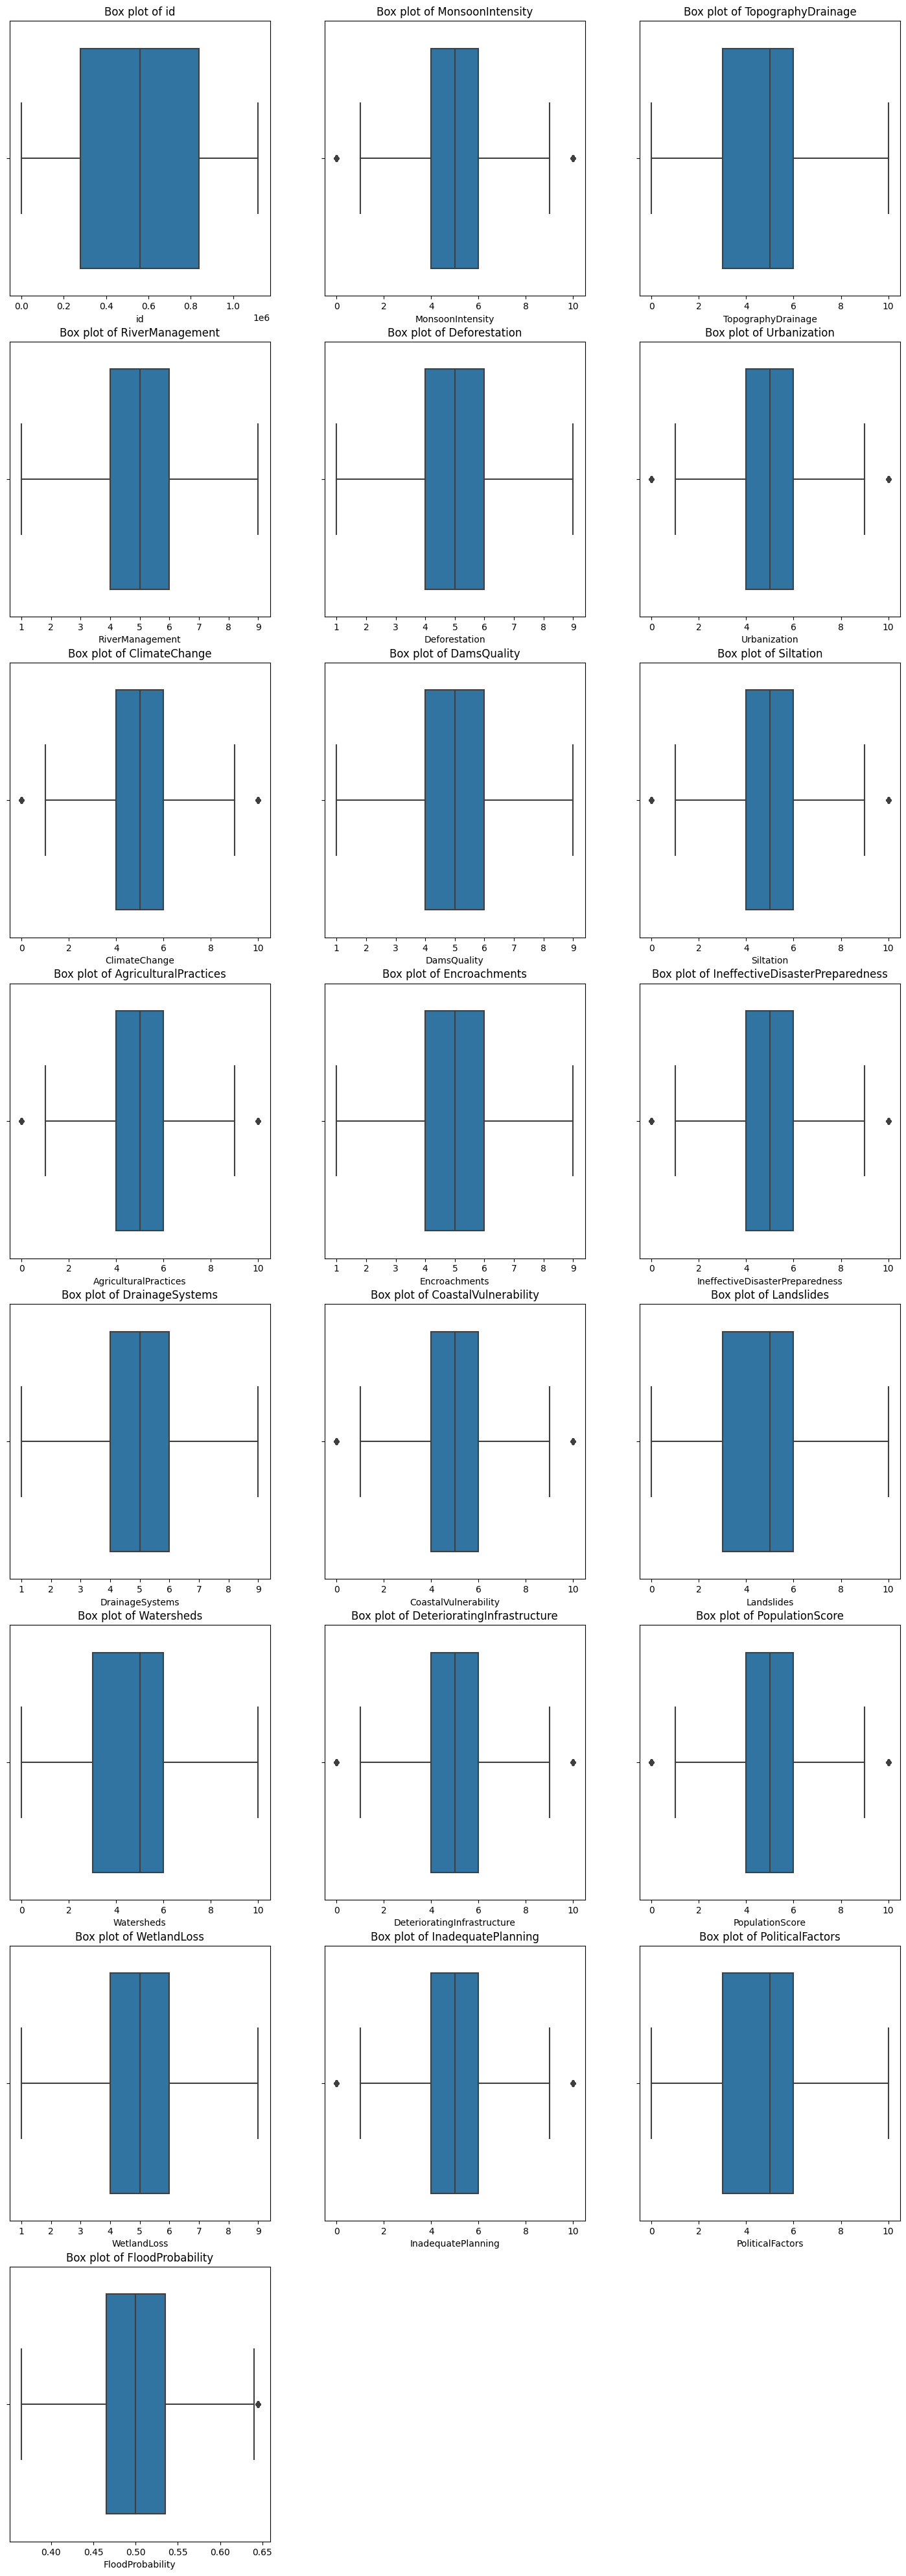

In [9]:
# Check after cleaning the outliers

# Calculate number of rows and columns needed for the grid
n_features = len(df.columns)
n_cols = 3  # You can adjust this number to change grid width
n_rows = math.ceil(n_features / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
fig.tight_layout(pad=3.0)  # Add padding between subplots

# Flatten axes array for easier iteration
axes = axes.flatten()

# Create boxplots
for idx, feature in enumerate(df.columns):
    sns.boxplot(x=df[feature], ax=axes[idx])
    axes[idx].set_title(f'Box plot of {feature}')

# Remove empty subplots if any
for idx in range(len(df.columns), len(axes)):
    fig.delaxes(axes[idx])

plt.show()

Alright, with outliers handled, it’s time to tackle the high variation in our data. Since all our features are numerical, there’s no need to transform them—we’ll just apply standardization. Let’s bring in the StandardScaler to get everything in line.

Standardization is key! It puts all our features on the same scale, helping our model learn more effectively and boosting accuracy in the results. Let’s get everything leveled out.

In [10]:
from sklearn.preprocessing import StandardScaler

# Just to make sure only numerical data that will be processed
numeric_features = df.select_dtypes(include=['number']).columns
numeric_features

# Standard
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

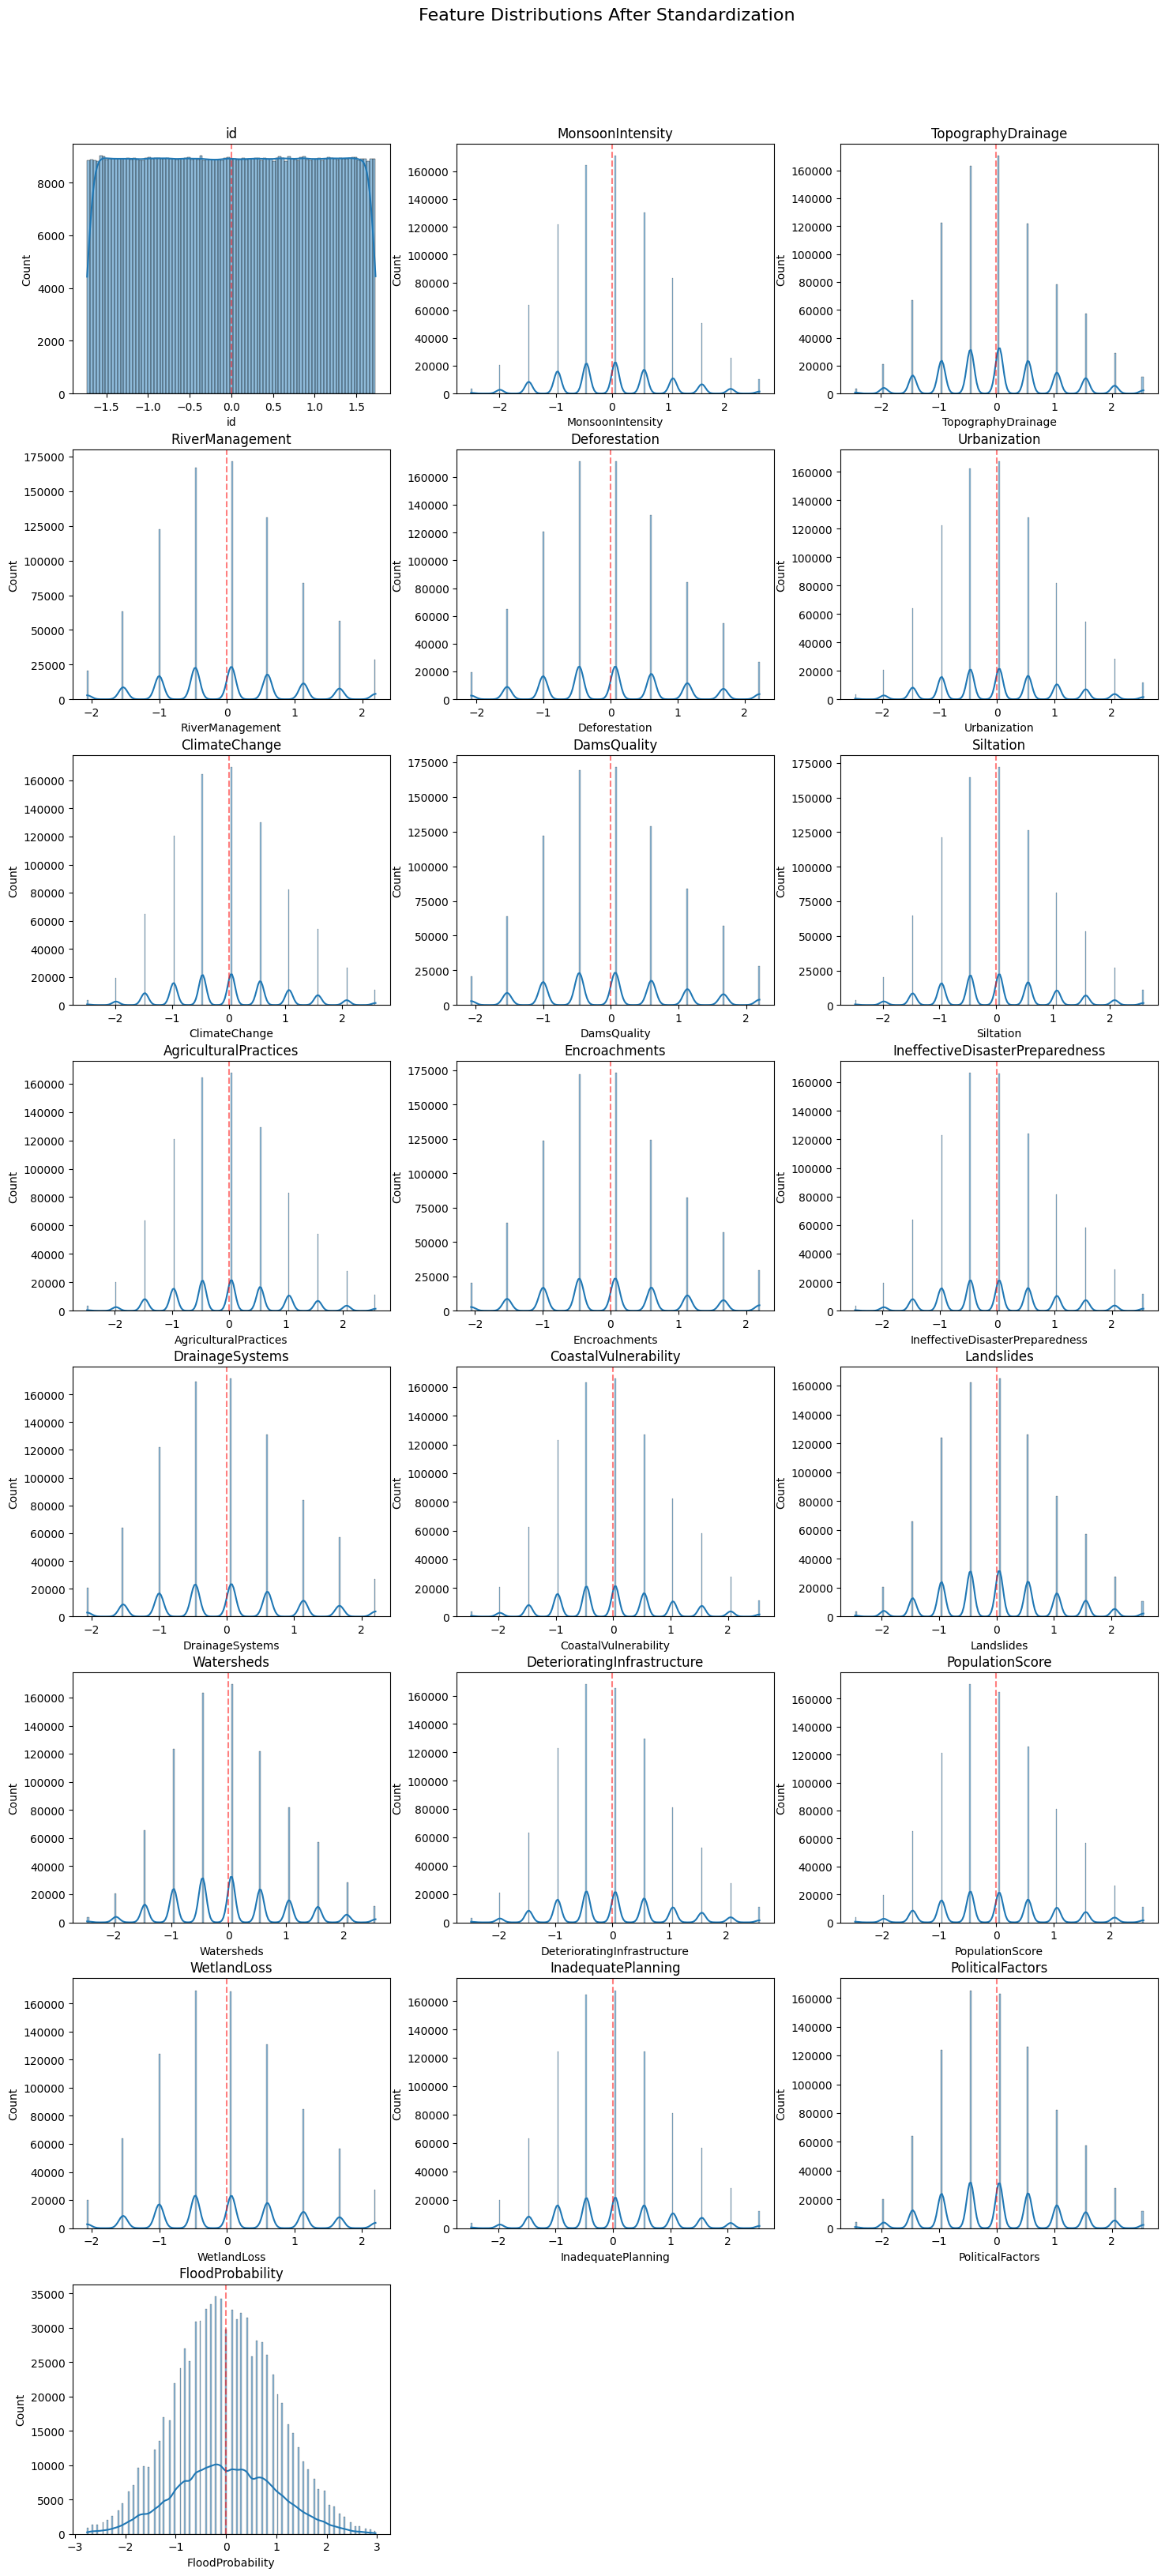

In [11]:
# Calculate grid dimensions
n_features = len(numeric_features)
n_cols = 3
n_rows = math.ceil(n_features / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
fig.suptitle('Feature Distributions After Standardization', y=1.02, fontsize=16)
fig.tight_layout(pad=3.0)

# Flatten axes array
axes = axes.flatten()

# Create histograms
for idx, feature in enumerate(numeric_features):
    sns.histplot(data=df, x=feature, kde=True, ax=axes[idx])
    axes[idx].axvline(x=0, color='r', linestyle='--', alpha=0.5)  # Add mean line
    axes[idx].set_title(f'{feature}')

# Remove empty subplots
for idx in range(n_features, len(axes)):
    fig.delaxes(axes[idx])

plt.show()

Then, we check if our data have duplicates.

In [12]:
duplicates = df.duplicated()

print("Row with duplicates : ")
print(df[duplicates])

Row with duplicates : 
Empty DataFrame
Columns: [id, MonsoonIntensity, TopographyDrainage, RiverManagement, Deforestation, Urbanization, ClimateChange, DamsQuality, Siltation, AgriculturalPractices, Encroachments, IneffectiveDisasterPreparedness, DrainageSystems, CoastalVulnerability, Landslides, Watersheds, DeterioratingInfrastructure, PopulationScore, WetlandLoss, InadequatePlanning, PoliticalFactors, FloodProbability]
Index: []

[0 rows x 22 columns]


Next up is exploring and explaining our data! Here, we’ll dive in to uncover some insights and see what stories our data has to tell.

In [13]:
df.describe(include='all')

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,...,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05
mean,3.128825e-16,-1.722920e-16,-8.252983e-18,-1.122910e-16,-1.138030e-16,-1.484907e-17,1.193637e-16,1.572309e-16,-1.516197e-17,1.194309e-16,...,-2.232715e-17,-1.108210e-16,-1.940060e-16,-1.644633e-16,-2.222467e-16,5.821188e-17,1.895708e-16,1.429887e-16,-7.076985e-17,-6.328547e-16
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.732268e+00,-2.503498e+00,-2.449018e+00,-2.065325e+00,-2.080702e+00,-2.472198e+00,-2.500029e+00,-2.062896e+00,-2.487267e+00,-2.487272e+00,...,-2.066946e+00,-2.475094e+00,-2.465862e+00,-2.464520e+00,-2.485485e+00,-2.478098e+00,-2.067744e+00,-2.472204e+00,-2.463924e+00,-2.759991e+00
25%,-8.661751e-01,-4.542981e-01,-9.492630e-01,-4.681183e-01,-4.675365e-01,-4.615469e-01,-4.631232e-01,-4.656514e-01,-4.564057e-01,-4.636059e-01,...,-4.634462e-01,-4.649776e-01,-9.579532e-01,-9.577833e-01,-4.547982e-01,-4.547462e-01,-4.655010e-01,-4.602404e-01,-9.593186e-01,-7.136972e-01
50%,2.024918e-05,5.800187e-02,5.057361e-02,6.428396e-02,7.018534e-02,4.111574e-02,4.610324e-02,6.676350e-02,5.130956e-02,4.231074e-02,...,7.105385e-02,3.755159e-02,4.731955e-02,4.670802e-02,5.287338e-02,5.109174e-02,6.857993e-02,4.275047e-02,4.375149e-02,2.505596e-03
75%,8.661002e-01,5.703019e-01,5.504919e-01,5.966862e-01,6.079072e-01,5.437784e-01,5.553296e-01,5.991784e-01,5.590249e-01,5.482274e-01,...,6.055539e-01,5.400808e-01,5.499559e-01,5.489537e-01,5.605450e-01,5.569297e-01,6.026608e-01,5.457413e-01,5.452865e-01,7.187084e-01
max,1.732027e+00,2.619502e+00,2.550165e+00,2.193893e+00,2.221073e+00,2.554429e+00,2.592235e+00,2.196423e+00,2.589886e+00,2.571894e+00,...,2.209054e+00,2.550197e+00,2.560501e+00,2.557936e+00,2.591231e+00,2.580282e+00,2.204904e+00,2.557705e+00,2.551427e+00,2.969631e+00


Alright, to make things easier to understand, let’s create some visualizations to show the standard deviation in our data. A picture’s worth a thousand stats. Standardization helps reduce bias or skewness in data with uneven distribution. By putting all features on the same scale, it makes it easier for our machine learning model to spot relevant patterns.

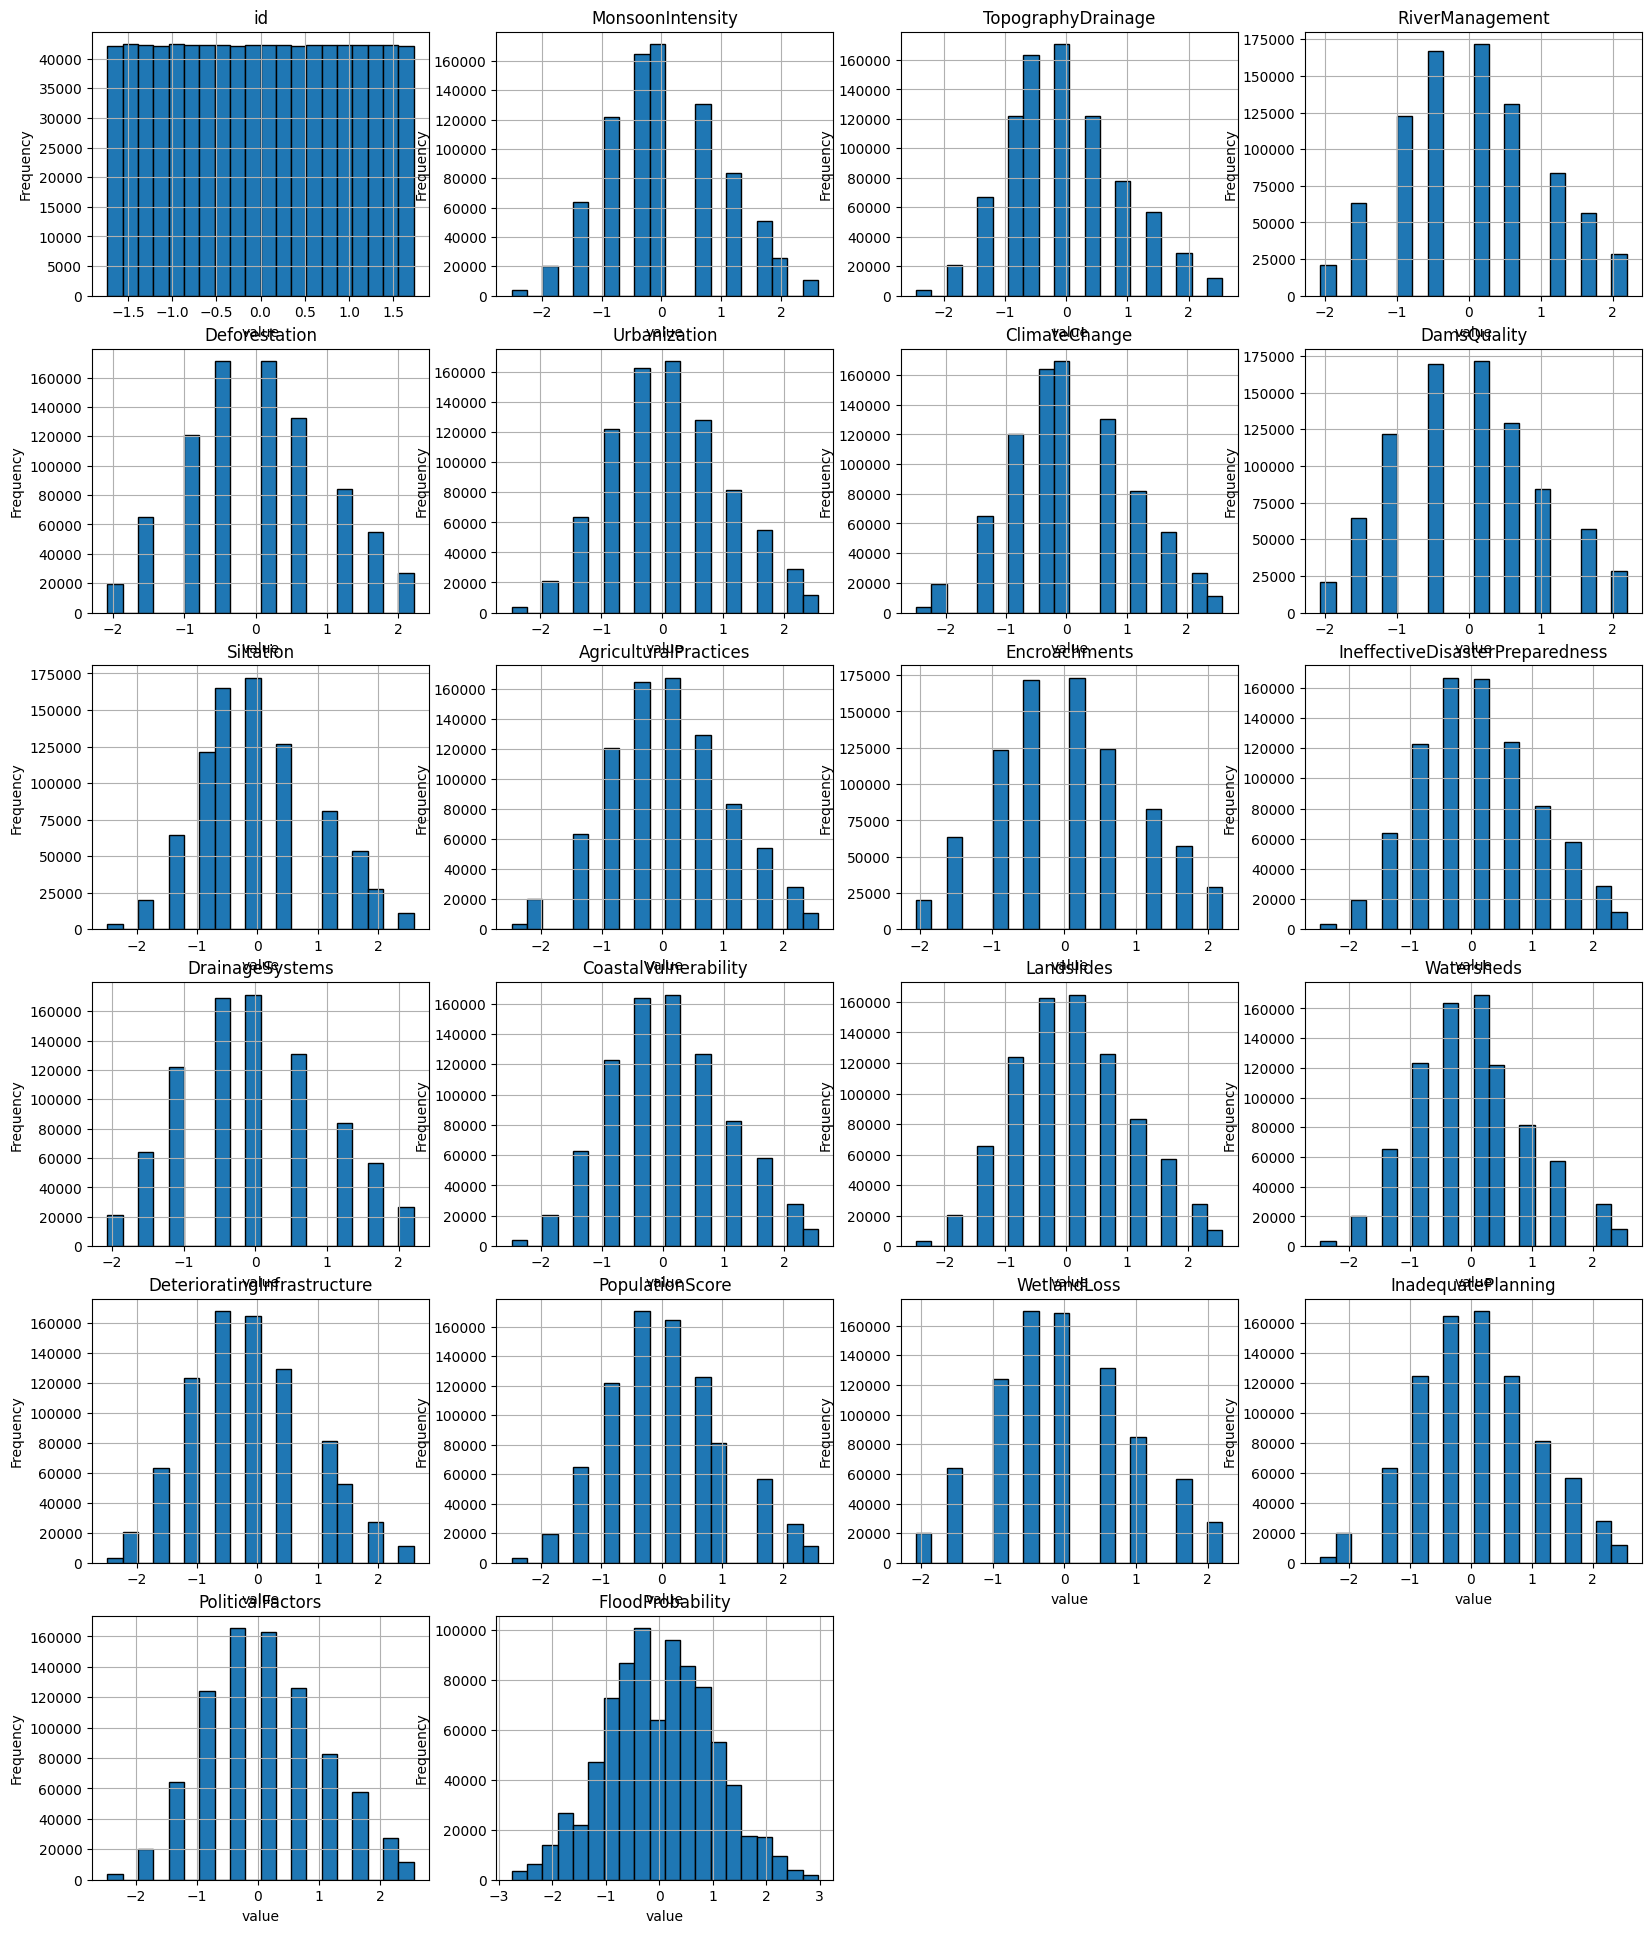

In [14]:
# Count the total of var
num_vars = df.shape[1]

# Determine total of row and column for the grid subplot
n_cols = 4
n_rows = -(-num_vars // n_cols) 

# Create subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

# Flatten the axes to ease the iteration
axes = axes.flatten()

# Plot each var
for i, column in enumerate(df.columns):
    df[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('value')
    axes[i].set_ylabel('Frequency')

# Delete unneeded subplot (if any)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout
plt.show()

Next, we choose our target feature which is FloodProbability

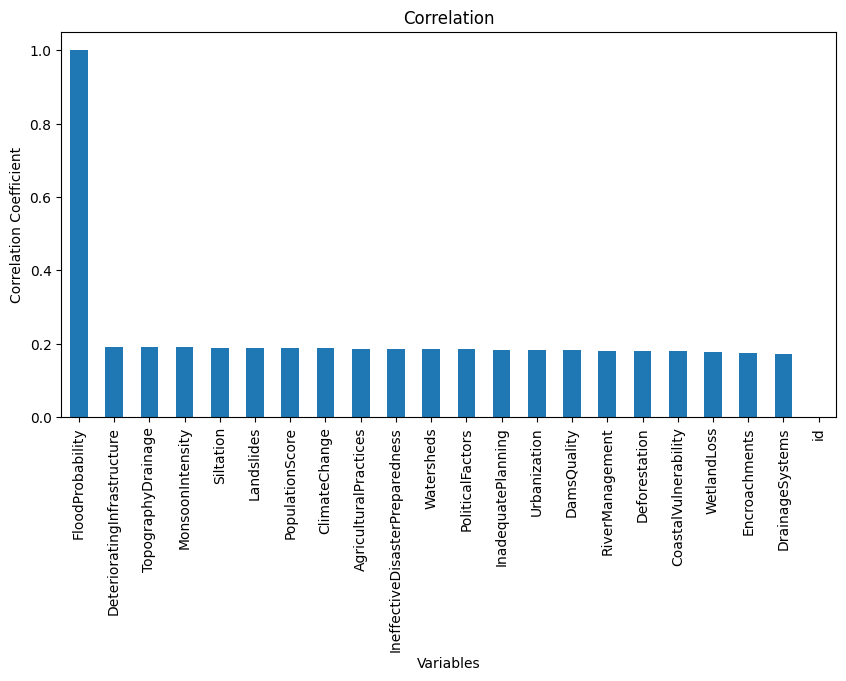

In [15]:
# Count corr between variable target and all others variable
target_corr = df.corr()['FloodProbability']

# Sort
target_corr_sorted = target_corr.abs().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
target_corr_sorted.plot(kind='bar')
plt.title(f'Correlation')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.show()

## Data Splitting

Next up is data splitting! This step ensures our model can generalize well to new, unseen data. By dividing our data into training and testing sets, we prevent evaluation bias and help optimize the model’s performance on real-world data.

Data splitting helps us evaluate model performance more objectively. By dividing the data into training and testing sets, we can see how well the model performs on unseen data, simulating real-world conditions and helping to prevent overfitting. Additionally, breaking the data down further into training, validation, and testing sets allows us to fine-tune hyperparameters without touching the test data, which should be reserved for a one-time, final evaluation.

In [16]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Divide feature(X) and target(Y)
X = df.drop(columns=['FloodProbability'])
y = df['FloodProbability']

# Divide the dataset into training and testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Count all the data
print("Total Data :", len(X))
print("Train Data :", len(x_train))
print("Test Data :", len(x_test))

Total Data : 845886
Train Data : 676708
Test Data : 169178


## Data Modelling

With our data split, it’s time for modeling! We’ll train our model using the prepared training data and evaluate it with the testing or validation set. During training, the model will analyze the features to understand the relationship between them and the target, learning patterns that will help it make predictions on new data.

I'm using three model to compare each other.

In [17]:
# LARS Model
from sklearn import linear_model

lars = linear_model.Lars(n_nonzero_coefs=1).fit(x_train, y_train)

pred_lars = lars.predict(x_test)

In [18]:
# Linear Regression
from sklearn.linear_model import LinearRegression

LR = LinearRegression().fit(x_train, y_train)

pred_LR = LR.predict(x_test)

In [19]:
# Gradient Boost Regressor
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor(random_state=184)
GBR.fit(x_train, y_train)

pred_GBR = GBR.predict(x_test)

After training our model, we’ll test its performance on the validation data. This step is crucial to ensure that our model isn’t just performing well on the training data, but can also handle new, unseen data effectively.

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_lars = mean_absolute_error(y_test, pred_lars)
mae_LR = mean_absolute_error(y_test, pred_LR)
mae_GBR = mean_absolute_error(y_test, pred_GBR)

mse_lars = mean_squared_error(y_test, pred_lars)
mse_LR = mean_squared_error(y_test, pred_LR)
mse_GBR = mean_squared_error(y_test, pred_GBR)

r2_lars = r2_score(y_test, pred_lars)
r2_LR = r2_score(y_test, pred_LR)
r2_GBR = r2_score(y_test, pred_GBR)



In [21]:
# Create data dict to save evaluation result
data = {
    'MAE': [mae_lars, mae_LR, mae_GBR],
    'MSE': [mse_lars, mse_LR, mse_GBR],
    'R2' : [r2_lars, r2_LR, r2_GBR]
}

df_results = pd.DataFrame(data, index=['Lars', 'LinearRegression', 'GBR'])
df_results

,MAE,MSE,R2
Lars,0.806497,0.998246,0.000764
LinearRegression,0.329142,0.171296,0.828534
GBR,0.512672,0.380491,0.619132


As we can see, linear regression outperformed the other models. This is likely because there’s a straightforward, linear relationship between the features and the target. When the relationship is linear or close to it, a linear regressor typically excels, as it’s designed to capture linear patterns effectively without needing complex structures to identify the relationship.